### 1. Library

In [78]:
import sys
import os

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image
from keras.utils import plot_model

### 2. Data

##### 데이터 불러오고 label에 따라 X_train, Y_train으로 분류

In [79]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

X_train = train.drop(["label"], axis = 1)
Y_train = train['label']

test = test.drop(["label"], 1)

C:\Users\user\AppData\Local\Temp\ipykernel_17332\671443956.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop(["label"], 1)


##### reshape 함수를 통해 28x28 배열로 변환시키기

In [80]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

##### 0 : T-shirt/top   1 : Trouser   2 : Pullover   3 : Dress   4 : Coat   5 : Sandal   6 : Shirt   7 : Sneaker   8 : Bag   9 : Ankle boot

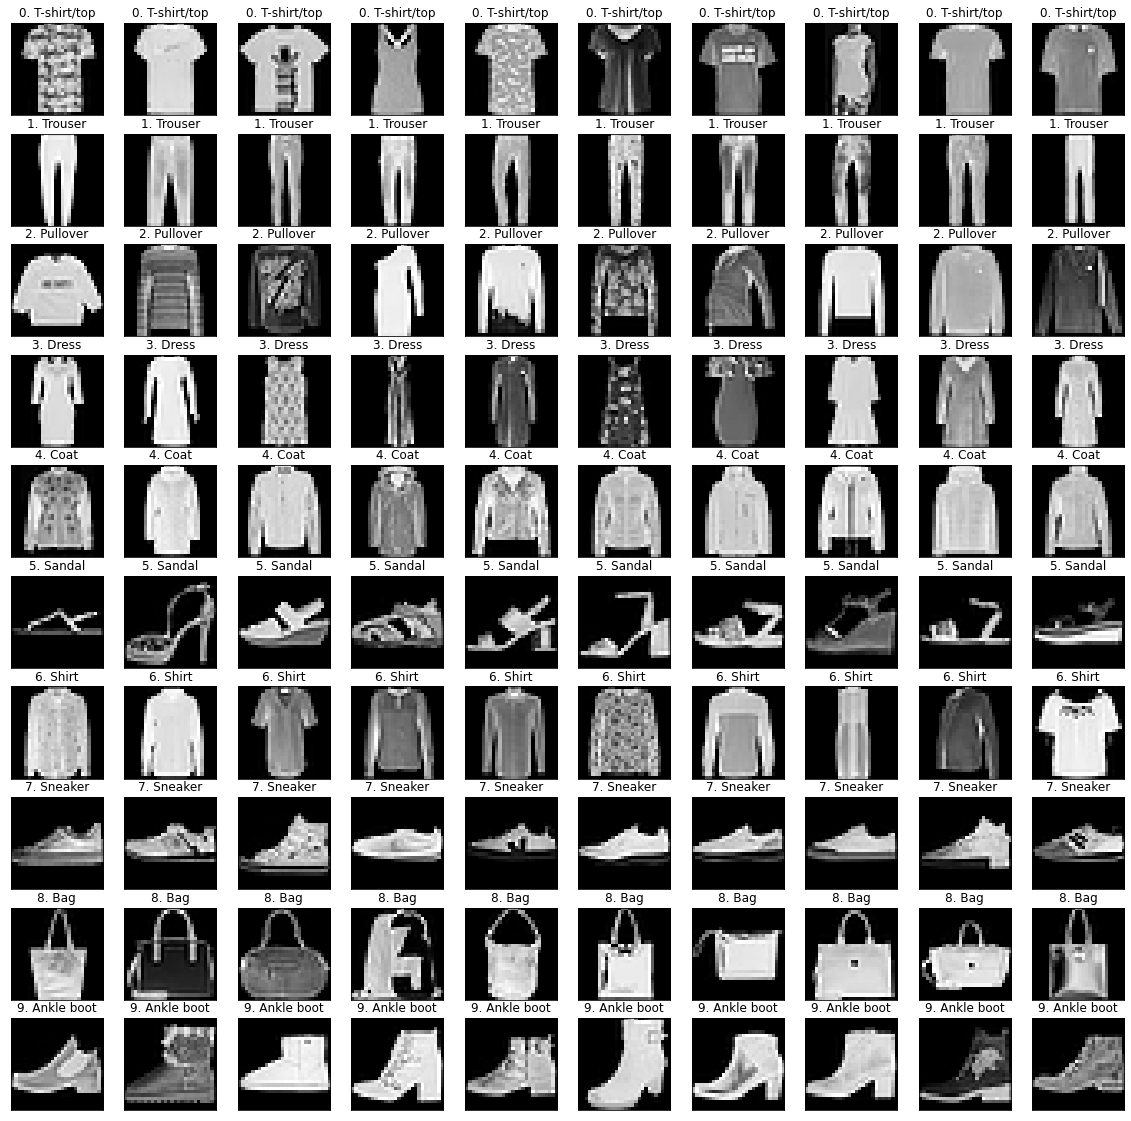

In [81]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize = (20, 20))
for k in range(10):
    XX = X_train[Y_train == k]
    YY = Y_train[Y_train == k].reset_index()['label']
    for i in range(10):
        plt.subplot(10, 10, k*10 + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(XX[i][:, :, 0], cmap = 'gray')
        label_index = int(YY[i])
        plt.title('{}. {}'.format(k, class_names[label_index]))

plt.show()

### 4. Train/test set 분류

In [82]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 100)

In [83]:
print("Train set 이미지 수 : {} 개".format(X_train.shape[0]))
print("Validation set 이미지 수 : {} 개".format(X_val.shape[0]))

Train set 이미지 수 : 48000 개
Validation set 이미지 수 : 12000 개


In [84]:
# CNN

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)

### 5. 모델

In [86]:
# Convolution 신경망 설정

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                      

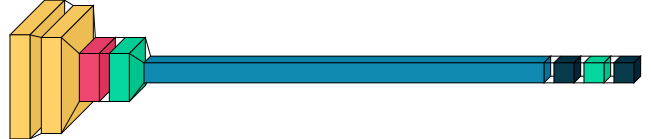

In [88]:
visualkeras.layered_view(model)

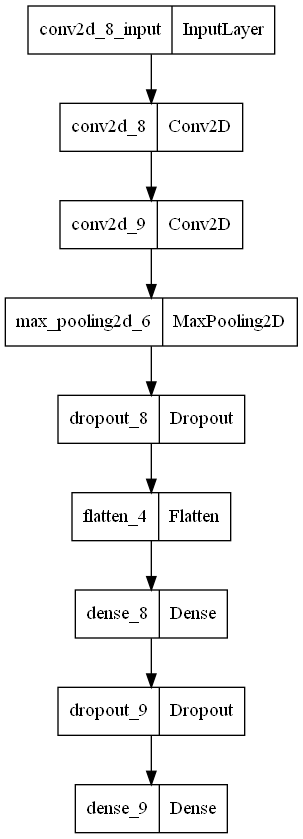

In [89]:
plot_model(model)

##### 모델 컴파일 -> 오차 함수로 categorical_crossentropy, 최적화 함수로 adam 사용

In [90]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [91]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 20, batch_size = 200)

print("\n Test Accuracy : %.4f" % (model.evaluate(X_val, Y_val)[1]))

Epoch 1/20
240/240 [==============================] - 92s 378ms/step - loss: 0.5902 - accuracy: 0.7941 - val_loss: 0.3491 - val_accuracy: 0.8772
Epoch 2/20
240/240 [==============================] - 97s 404ms/step - loss: 0.3802 - accuracy: 0.8668 - val_loss: 0.3062 - val_accuracy: 0.8902
Epoch 3/20
240/240 [==============================] - 96s 401ms/step - loss: 0.3273 - accuracy: 0.8834 - val_loss: 0.2739 - val_accuracy: 0.9003
Epoch 4/20
240/240 [==============================] - 98s 406ms/step - loss: 0.2971 - accuracy: 0.8940 - val_loss: 0.2593 - val_accuracy: 0.9080
Epoch 5/20
240/240 [==============================] - 106s 440ms/step - loss: 0.2734 - accuracy: 0.9006 - val_loss: 0.2470 - val_accuracy: 0.9132
Epoch 6/20
240/240 [==============================] - 100s 417ms/step - loss: 0.2497 - accuracy: 0.9104 - val_loss: 0.2367 - val_accuracy: 0.9153
Epoch 7/20
240/240 [==============================] - 96s 398ms/step - loss: 0.2332 - accuracy: 0.9139 - val_loss: 0.2197 - val_

### 6. 오차와 정확도 확인

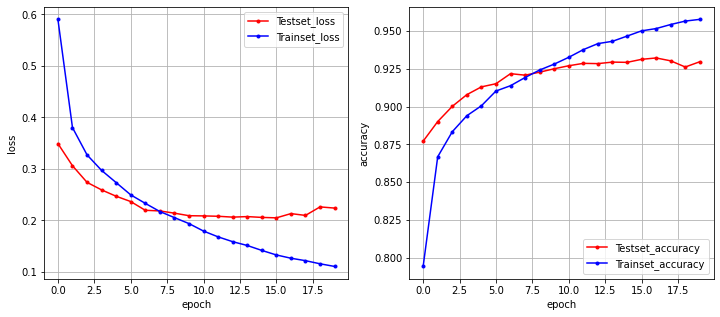

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# 오차
y_vloss = history.history['val_loss']

# 학습set 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
ax1.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
ax1.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

# 그래프에 grid를 주고 레이블 표시
ax1.legend(loc = 'upper right')
ax1.grid()
ax1.set(xlabel = 'epoch', ylabel = 'loss')

# 정확도
y_vaccuracy = history.history['val_accuracy']

# 학습set
y_accuracy = history.history['accuracy']

# 그래프로 표현
x_len = np.arange(len(y_accuracy))
ax2.plot(x_len, y_vaccuracy, marker = '.', c = "red", label = 'Testset_accuracy')
ax2.plot(x_len, y_accuracy, marker = '.', c = "blue", label = 'Trainset_accuracy')

# 그래프에 grid를 주고 레이블 표시
ax2.legend(loc = 'lower right')
ax2.grid()

ax2.set(xlabel = 'epoch', ylabel = 'accuracy')

ax2.grid(True)
plt.show()

### 7. 모델 최적화

##### 주어진 MNIST 데이터에 대한 분류 모델의 성능을 개선시키기 위하여 하이퍼파라미터를 튜닝한다. 이를 최적화라고 하고, 그 결과는 다음과 같다.

In [93]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 5, 5, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 1600)             

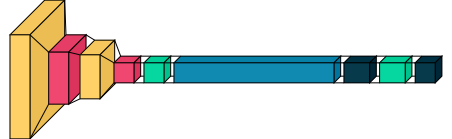

In [95]:
visualkeras.layered_view(model)

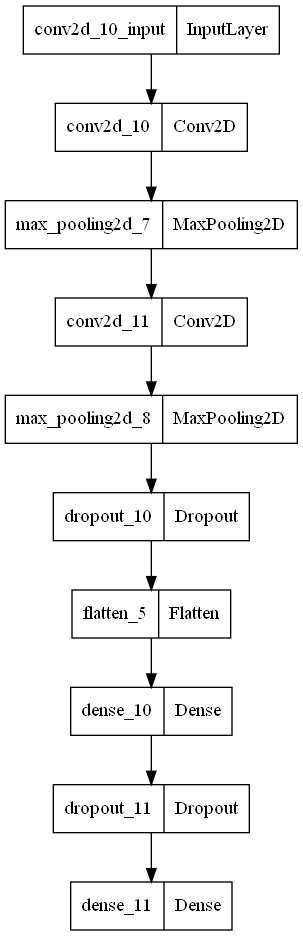

In [96]:
plot_model(model)

In [97]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [98]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 20, batch_size = 256)

print("\n Test Accuracy : %.4f" % (model.evaluate(X_val, Y_val)[1]))

Epoch 1/20
188/188 [==============================] - 44s 230ms/step - loss: 0.7556 - accuracy: 0.7245 - val_loss: 0.4503 - val_accuracy: 0.8387
Epoch 2/20
188/188 [==============================] - 44s 232ms/step - loss: 0.4839 - accuracy: 0.8221 - val_loss: 0.3843 - val_accuracy: 0.8634
Epoch 3/20
188/188 [==============================] - 39s 205ms/step - loss: 0.4257 - accuracy: 0.8456 - val_loss: 0.3618 - val_accuracy: 0.8673
Epoch 4/20
188/188 [==============================] - 38s 200ms/step - loss: 0.3913 - accuracy: 0.8576 - val_loss: 0.3280 - val_accuracy: 0.8805
Epoch 5/20
188/188 [==============================] - 39s 208ms/step - loss: 0.3686 - accuracy: 0.8646 - val_loss: 0.3160 - val_accuracy: 0.8813
Epoch 6/20
188/188 [==============================] - 38s 204ms/step - loss: 0.3477 - accuracy: 0.8737 - val_loss: 0.3001 - val_accuracy: 0.8885
Epoch 7/20
188/188 [==============================] - 37s 198ms/step - loss: 0.3330 - accuracy: 0.8783 - val_loss: 0.2860 - val_ac

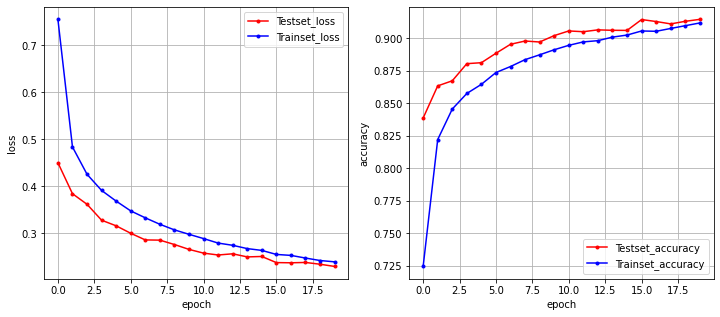

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
ax1.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
ax1.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

ax1.legend(loc = 'upper right')
ax1.grid()
ax1.set(xlabel = 'epoch', ylabel = 'loss')

y_vaccuracy = history.history['val_accuracy']

y_accuracy = history.history['accuracy']

x_len = np.arange(len(y_accuracy))
ax2.plot(x_len, y_vaccuracy, marker = '.', c = "red", label = 'Testset_accuracy')
ax2.plot(x_len, y_accuracy, marker = '.', c = "blue", label = 'Trainset_accuracy')


ax2.legend(loc = 'lower right')
ax2.grid()

ax2.set(xlabel = 'epoch', ylabel = 'accuracy')

ax2.grid(True)
plt.show()

##### 첫 번째 모델과 튜닝한 모델을 비교해보자면 accuracy는 0.01 정도 떨어졌지만, loss는 더 낮아졌다.

### 8. 틀린 데이터 확인

In [100]:
y_pred = model.predict(X_val).round(2)

y_val_label = list(map(np.argmax, Y_val))
y_pred_label = list(map(np.argmax, y_pred))

375/375 [==============================] - 6s 15ms/step


<AxesSubplot:>

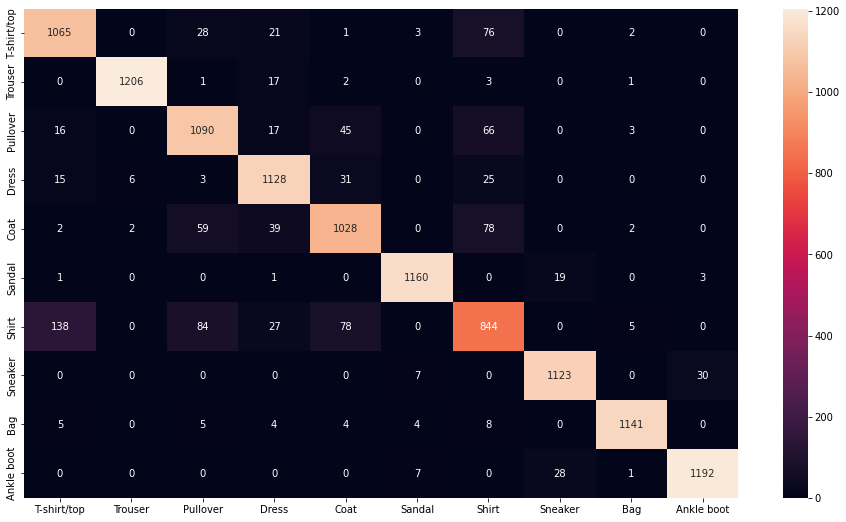

In [101]:
plt.figure(figsize = (16, 9))

cm = confusion_matrix(y_val_label, y_pred_label)

sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = class_names, yticklabels = class_names)

##### heatmap을 그려 확인해본 결과는 위와 같다.
##### T-shirt/top 이미지만 확인해보면 1065개는 제대로 분류했고 28개는 Pullover로, 21개는 Dress로, 1개는 Coat로, 3개는 Sandal로, 76개는 Shirt로, 2개는 Bag로 오분류한것을 확인할 수 있다.

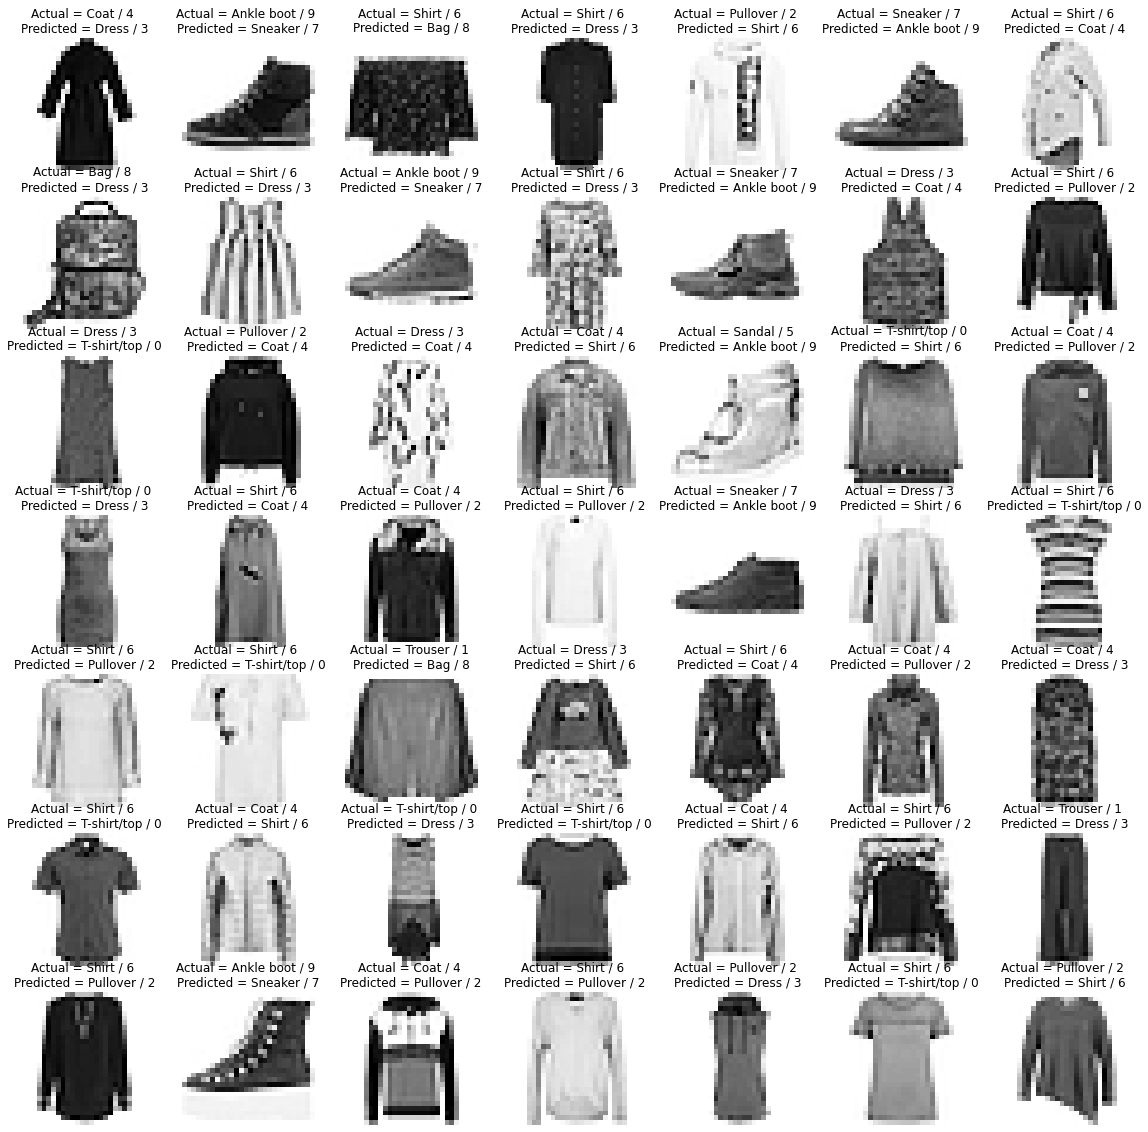

In [102]:
aaa = np.array(y_val_label) != np.array(y_pred_label)

not_equal_list = np.where(aaa == True)[0]

plt.figure(figsize = (20, 20))
j = 1
for i in not_equal_list[0:49]:
    plt.subplot(7, 7, j);
    j += 1
    plt.imshow(X_val[i].reshape(28, 28), cmap = 'Greys')
    plt.axis('off')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_names[y_val_label[i]], y_val_label[i], class_names[y_pred_label[i]], y_pred_label[i]))

##### 틀린 데이터를 이미지로 확인해보니, 1행 1열의 그림을 보면 Coat를 Dress로 분류했다. 틀린 분류를 하긴 했지만, 사람도 잘 분류하기 어려운 이미지였다.
##### 하지만 2행 1열의 그림을 보면 Bag를 Dress로 분류했다. 이 이미지는 아무리봐도 Bag인데 Dress로 분류한것으로 보아 분류를 잘하지 못했다고 볼 수 있다.